https://www.pyimagesearch.com/2014/03/03/charizard-explains-describe-quantify-image-using-feature-vectors/

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_core/py_basic_ops/py_basic_ops.html



# import modules

In [1]:
# https://pypi.org/project/opencv-python/
# https://github.com/skvark/opencv-python

# https://en.wikipedia.org/wiki/OpenCV says
# OpenCV (Open source computer vision) is a library of programming functions 
# mainly aimed at real-time computer vision.
!pip install opencv-python

  Using cached https://files.pythonhosted.org/packages/c0/a9/9828dfaf93f40e190ebfb292141df6b7ea1a2d57b46263e757f52be8589f/opencv_python-4.1.2.30-cp36-cp36m-manylinux1_x86_64.whl


In [2]:
import cv2
print('cv2',cv2.__version__)

cv2 4.1.2


In [3]:
from matplotlib import pyplot as plt

# load image

https://www.pyimagesearch.com/2014/11/03/display-matplotlib-rgb-image/

https://stackoverflow.com/questions/39316447/opencv-giving-wrong-color-to-colored-images-on-loading

In [11]:
image = cv2.imread("charizard.png", cv2.COLOR_BGR2RGB)
image.shape

(198, 254, 3)

In [12]:
image[:,:,0].shape

(198, 254)

That's the image size in pixels and the three color channels for red, green, blue

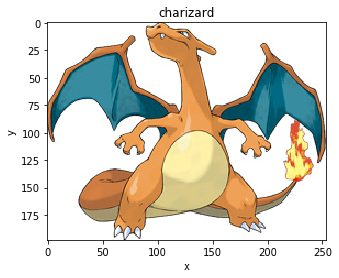

In [17]:
# plot the array using matplotlib
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
#plt.imshow(image[:,:,0])
plt.title('charizard')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

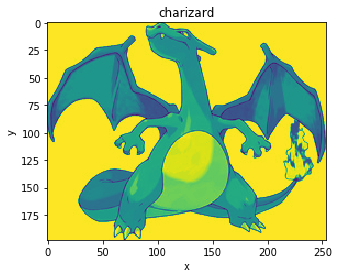

In [14]:
# plot the array using matplotlib
plt.imshow(image[:,:,1])
plt.title('charizard')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

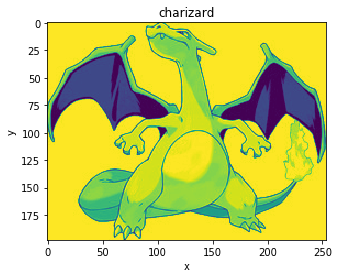

In [15]:
# plot the array using matplotlib
plt.imshow(image[:,:,2])
plt.title('charizard')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [16]:
print('pixel 0,0 has red',image[0,0,0],'green',image[0,0,1],'blue',image[0,0,2])

pixel 0,0 has red 255 green 255 blue 255


we can verify that (255,255,255) is white on the table https://www.rapidtables.com/web/color/RGB_Color.html

The simplest method of converting three 2D matrices to a 1 dimensional vector of integers would be to stack all the values

In [7]:
198* 254* 3

150876

In [8]:
raw = image.flatten()
raw.shape

(150876,)

In [9]:
raw

array([255, 255, 255, ..., 255, 255, 255], dtype=uint8)

The flattened array has a shape of 150,876 because there exists 198 x 254 = 50,292 pixels in the image with 3 values per pixel, thus 50,292 x 3 = 150,876.

However, that's not normally the approach used for preparing images

# reshape to standard size

Because images come in different sizes but our ML algorithms rely on having consistently-sized vectors, one step that's necessary is to reshape the image.

https://stackoverflow.com/questions/49180941/extract-feature-vector-from-2d-image-in-numpy

In [10]:
import numpy as np

src = cv2.imread("charizard.png")

In [11]:
type(src)

numpy.ndarray

In [12]:
target_size = (64,64)

dst = cv2.resize(src, target_size)

In [13]:
type(dst)

numpy.ndarray

In [14]:
dst.shape

(64, 64, 3)

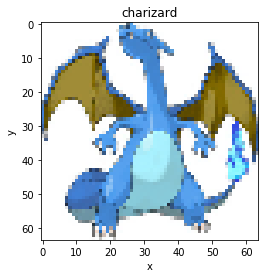

In [15]:
# plot the array using matplotlib
plt.imshow(dst)
plt.title('charizard')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Convert to a 1D vector:

In [16]:
dst = dst.reshape(target_size[0] * target_size[1]* 3)

In [17]:
dst

array([255, 255, 255, ..., 255, 255, 255], dtype=uint8)

# grayscale 
Often the color aspect is irrelevant, so we can reduce the computational workload by reducing the image to grayscale

In [18]:
image = cv2.imread('charizard.png', 0) # 0 is for grayscale
image.shape

(198, 254)

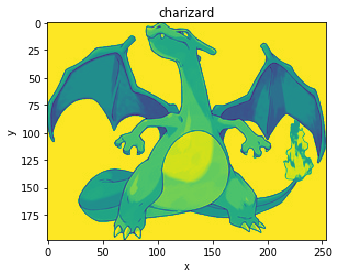

In [19]:
# plot the array using matplotlib
plt.imshow(image[:,:])
plt.title('charizard')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [20]:
image[1:4,1:4]

array([[255, 255, 255],
       [255, 255, 255],
       [255, 255, 255]], dtype=uint8)

In [21]:
image.min()

0

In [22]:
image.max()

255

In [33]:
image = cv2.imread('charizard.png', cv2.IMREAD_GRAYSCALE)
image.shape

(198, 254)

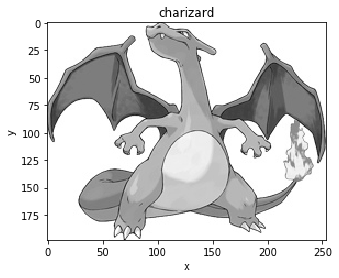

In [34]:
# plot the array using matplotlib
plt.imshow(image[:,:])
plt.title('charizard')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# skimage

https://www.analyticsvidhya.com/blog/2019/08/3-techniques-extract-features-from-image-data-machine-learning-python/

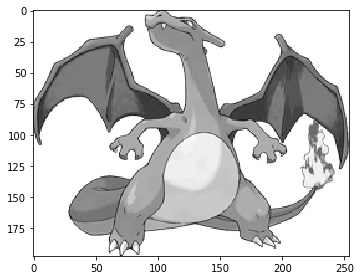

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread, imshow

image = imread('charizard.png', as_gray=True)
imshow(image)

In [24]:
image.shape

(198, 254)

In [25]:
image

array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       ..., 
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.]])

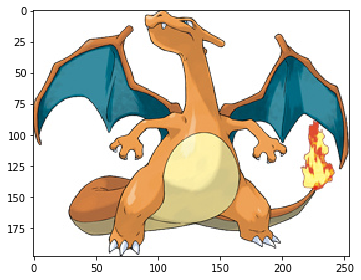

In [26]:
image = imread('charizard.png')
imshow(image)

In [27]:
image.shape

(198, 254, 3)

# PIL

https://datascience.stackexchange.com/questions/8847/feature-extraction-of-images-in-python

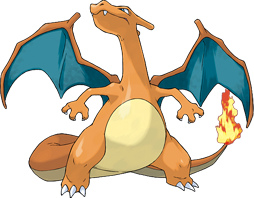

In [28]:
from PIL import Image

%matplotlib inline  

#Import an image
image = Image.open("charizard.png")

image

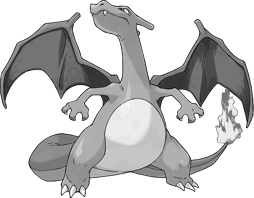

In [29]:
im = image.convert('L')

im

In [30]:
im_array = np.array(im)

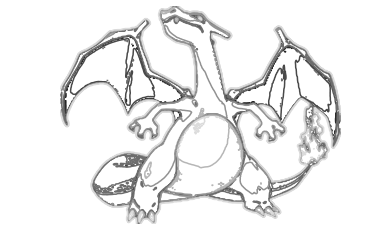

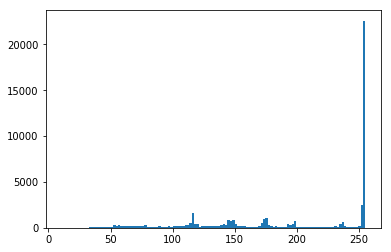

In [31]:
from pylab import *

# create a new figure
figure()
gray()
# show contours with origin upper left corner
contour(im, origin='image')
axis('equal')
axis('off')


figure()


hist(im_array.flatten(), 128)

show()

advanced:

https://www.kaggle.com/lorinc/feature-extraction-from-images